In [1]:
import onnxruntime
import cv2
from itertools import chain
from PIL import Image


In [47]:
model=onnxruntime.InferenceSession('models/buffalo_m_320.onnx')


In [49]:
img = cv2.imread("example.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = 640
if resize is not None:
    img = cv2.resize(img, (resize, resize))
outputs = sorted([x.name for x in model.get_outputs()])
bboxes, keypoints, scores = model.run(outputs, {"image": img})


for bbox in bboxes.astype("int"):
    img = cv2.rectangle(img, tuple(bbox[:2]), tuple(bbox[2:]), (255, 255, 255))

for kp in chain.from_iterable(keypoints.astype("int")):
    img = cv2.circle(img, kp, 10, (255, 255, 255))


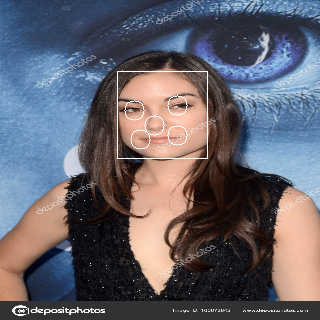

In [50]:
Image.fromarray(img)


In [4]:
model=onnxruntime.InferenceSession('/home/idk/notebooks/insight_face/models/buffalo_l_640.onnx')

Fail: [ONNXRuntimeError] : 1 : FAIL : Load model from /home/idk/notebooks/insight_face/models/buffalo_l_640.onnx failed:Node (PartitionedCall/model/tf.__operators__.getitem_2/strided_slice__49_sg2) Op (Squeeze) [ShapeInferenceError] Dimension of input 1 must be 1 instead of 0